# **Лабораторная работа номер 1**

Требуется создать ноутбук, в котором будут проведены эксперименты с инструментами `sklearn`.

Задачи:
* Произведите базовую подготовку данных;
* Создайте baseline модель линейной регрессии;
---
* Произведите расширенный анализ данных:
    - Оцените корреляции признаков;
    - Оцените распределения признаков;
    - Оцените характер зависимости целевой переменной от каждого признака;
    - Напишите свои выводы по результатам анализа.

* Изучите работу инструментов нормализации данных:
    - Примените трансформер `sklearn.preprocessing.StandardScaler` к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;
    - Примените трансформер `sklearn.preprocessing.MinMaxScaler` к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;
    - Сравните результаты и сделайте выводы.

* Изучите работу инструментов выравнивания распределений:
    - Примените трансформер `sklearn.preprocessing.PowerTransformer` к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;
    - Примените трансформер `sklearn.preprocessing.QuantileTransformer(output_distribution='normal')` к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;
    - Сравните результаты и сделайте выводы.

* Исключите выбросы на уровне `PRICE == 50` из данных, обучите модель и оцените показатели;

* Оцените работу модели при исключении каждого признака [13 экспериментов] (результаты представить в виде таблицы `DataFrame` с указание исключенного признака и показателей метрик);

* Примените трансформер `sklearn.preprocessing.PolynomialFeatures` для генерации признака `LSTAT` в квадрате, обучите модель на данных с новым признаком, оцените работу модели;

---
* Создайте базовую модель Ридж регрессии https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html;

* Испытайте работу модели при использовании различных методов нормализации и выравнивания распределений;

* Оцените работу модели при различных $\alpha$ (изучить не менее 7 различных значений) и отобразите на графике (y-axis ~ R2, x-axis ~ log(alpha));

---
* Разработайте лучшую модель с необходимой предобработкой для решения задачи;
* Написать выводы по результатам.

> **Не забывайте разбивать ноутбук на секции, использовать функции, делать выполнение ноутбука последовательным.** 


# Импортируем все нужные библиотеки



In [1]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# **Начнем работу!** 
импортируем данные о домах в Бостоне для автоматической установки цены


In [2]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(type(boston_data))

<class 'sklearn.utils.Bunch'>


In [3]:
# выведем имеющийся набор данных
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
feature_data = boston_data['data']
feature_names = boston_data['feature_names']
target_data = boston_data['target']
feature_data.shape

(506, 13)

In [5]:
# выведем имена признаков
feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Чтобы было удобней работать - переведем данные в формат фреймворка pandas (удобство отображения и работы)

In [6]:
df = pd.DataFrame(feature_data, columns=boston_data['feature_names'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Поскольку самый важный показатель (зависимый) - это цена, то выделим ее под собственным именем

In [7]:
df['PRICE'] = target_data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


 Оценим также данные на уникальность признаков

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

Признак CHAS имеет два значения - сделаем его категориальным.

In [10]:
df['CHAS'] = df['CHAS'].astype(int).astype(dtype='category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 52.1 KB


# Создадим baseline модель!

In [11]:
#  импортируем нужные функции из slkear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Разделим выборку

In [12]:
# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7
# X - DataFrame только с признаками (для примера берем все признаки)
X = df[feature_names]
# y - истинные значения (разметка)
y = df['PRICE'] # целвая функция (зависимая)
X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

# Отображение размеров выборок
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X.shape)

(354, 13) (354,)
(152, 13) (152,)
(506, 13)


Убедились, что размерности соответсвуют 

In [13]:
# Создаем объект
reg = LinearRegression()
# Обучаем на выборке для обучения с помощью метода fit
reg.fit(X_train, y_train) # обучение нашего объекта reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 Для того, чтобы работать с весами, создадим отдельную функцию

In [14]:

def show_linear_model_weights(model, feature_names):
    '''
    Отображение весов
    Аргументы:
        model - модель линейной регрессии
        feature_names - (опционально) если передано, отображение весов вместе с именами признаков
    '''
    print('\n----- Weights -----')
    weights = model.coef_
    bias = model.intercept_
    if feature_names is None:  
        print(f'Weights: {weights}')
    else:
        # Функция zip() делает из двух списков один список пар значений
        pairs = zip(feature_names, weights)
        for pair in pairs:
            print(f'{pair[0]} | {pair[1]}')

    print(f'Bias: {bias}')

show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -0.1334701028529461
ZN | 0.03580891359323195
INDUS | 0.04952264522005543
CHAS | 3.119835116285394
NOX | -15.417060895306689
RM | 4.057199231645403
AGE | -0.010820835184926221
DIS | -1.3859982431608788
RAD | 0.24272733982224926
TAX | -0.00870223436566183
PTRATIO | -0.9106852081102881
B | 0.011794115892575632
LSTAT | -0.5471133128239569
Bias: 31.631084035691632


 ## Наконец, отобразим график предсказаний!
 Используем для этого функцию predict
 
 Но для начала создадим функцю отдельного вывода этого предсказания!

In [15]:
# добавим функцию для отображения метрик
def evaluate_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)

    print(f'\n----- Evaluation for {mode} -----')
    print(f'  R2: {r2_score_value}')
    print(f'  RMSE: {rmse_score}')
    print(f'  MAE: {mae_score}')

In [16]:
def draw_predictions_plot(y_pred, y_true):
    plt.figure(figsize=(10, 9))
    plt.scatter(y_pred, y_true) # строим точечный график
    line_pnts = np.linspace(np.amin(y_pred)-0.1, np.amax(y_pred)+0.1, 1000) 
    plt.plot(line_pnts, line_pnts, 'k--')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.grid()

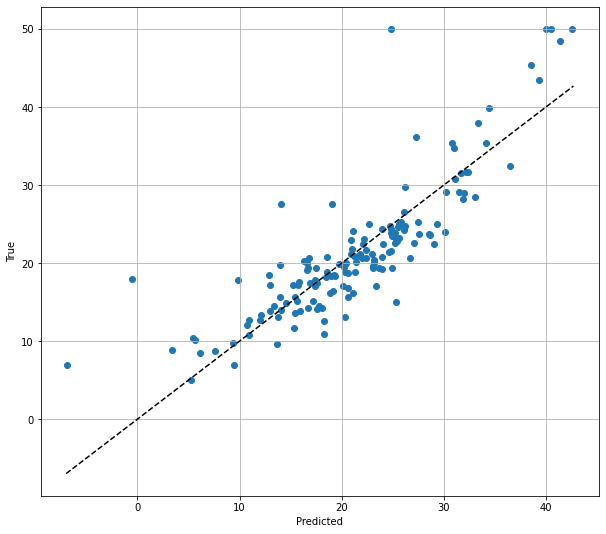

In [17]:
y_pred = reg.predict(X_test)
draw_predictions_plot(y_pred, y_test)

На этом графике, если точка лежит на линии - это значит что предсказание и реальное значение данных одинаковы (модель работает корректно!)


Ради интереса, посмотрим распределение ошибок.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


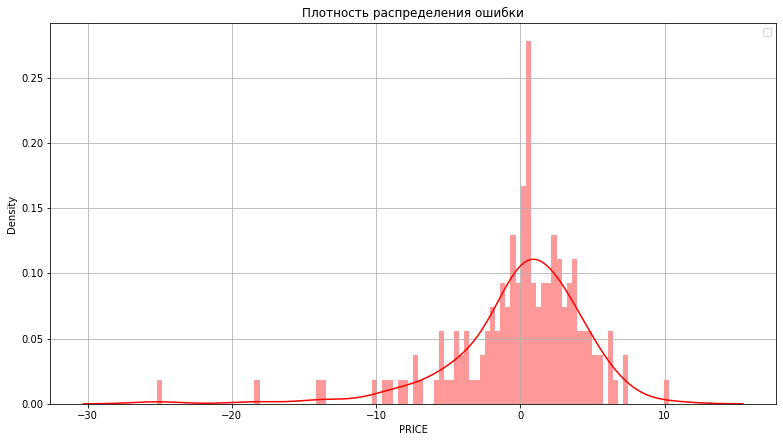

In [18]:

y_residuals = y_pred-y_test
plt.figure(figsize=(13, 7))
sns.distplot(y_residuals, bins=100,color="r",)
plt.title("Плотность распределения ошибки") 
plt.legend()
plt.grid()

Плотность имеет нормально распределение. Из графика видно, что нулевая ошибка встречается наиболее часто, большие ошибки практически исключены, что говорит о корректности предсказания.

In [19]:
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


# Произведем расширенный анализ данных:

Корреляция признаков (взаимовлияние)


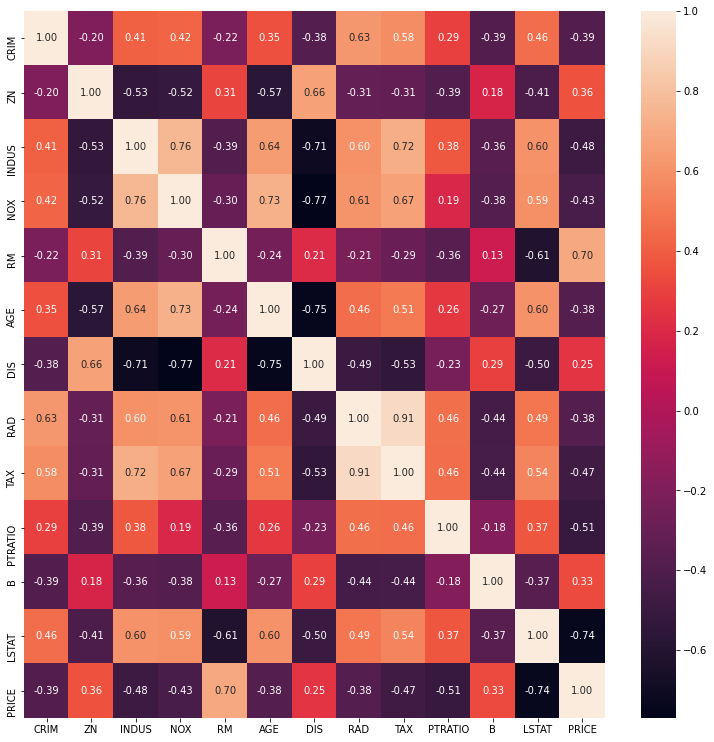

In [20]:
feature_names = np.append(feature_names,'PRICE') # ДОБАВИМ КОЛОНКУ ЦЕН
correlation_mtrx = df[feature_names].corr()
# добавим цветности и зададим размер
plt.figure(figsize=(13, 13))
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

Чем ярче цвет, тем сильней корреляция признаков! То есть, например, количество комнат RM в значительной степени влияет на итоговую цену. Кроме этого, есть также признаки, которые сильно коррелируют меж собой. Это может значить, что один из них можно будет исключить. Пример - признаки TAX и RAD.

## Оценим распределения признаков


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

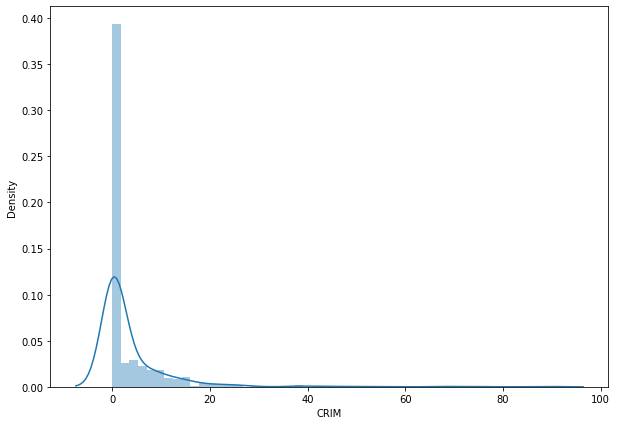

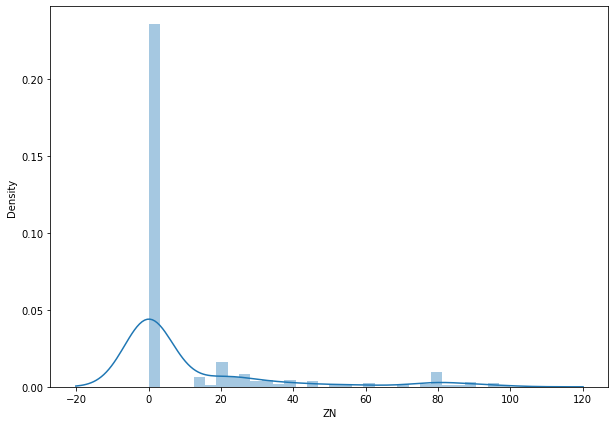

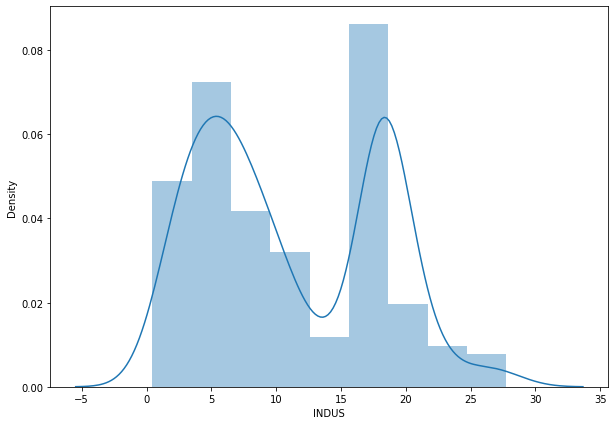

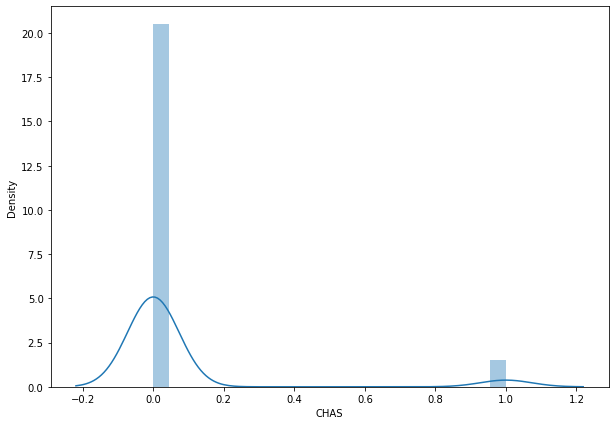

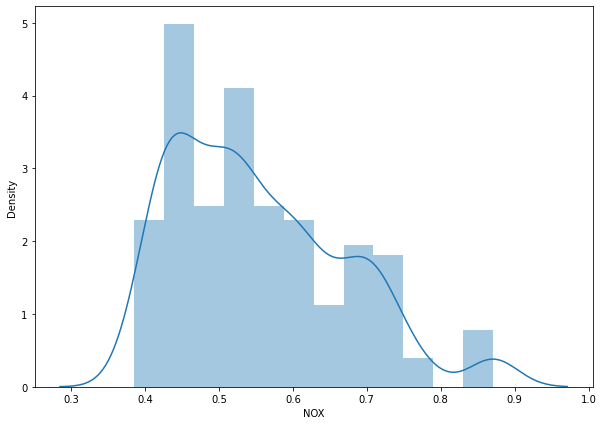

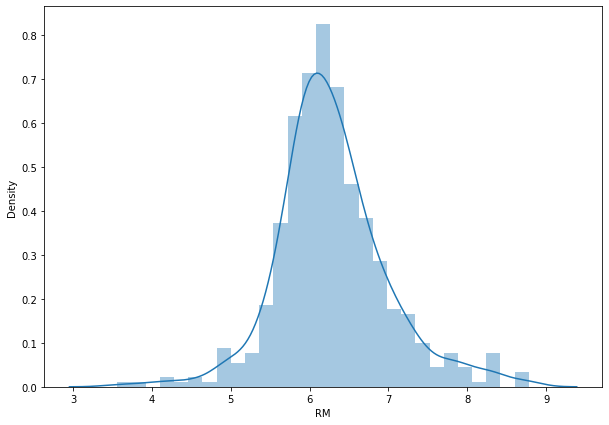

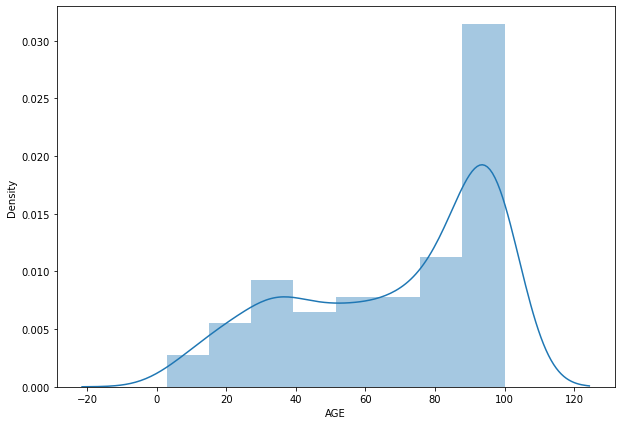

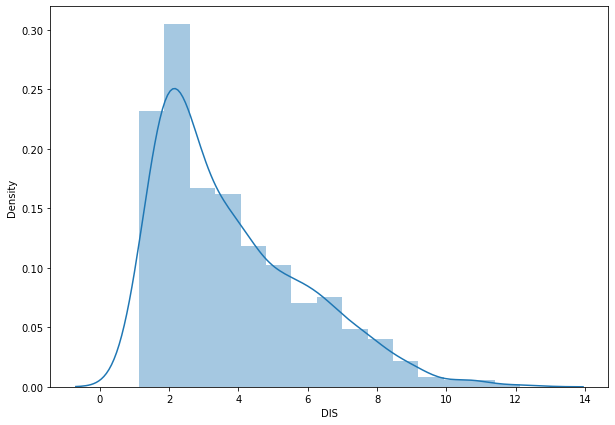

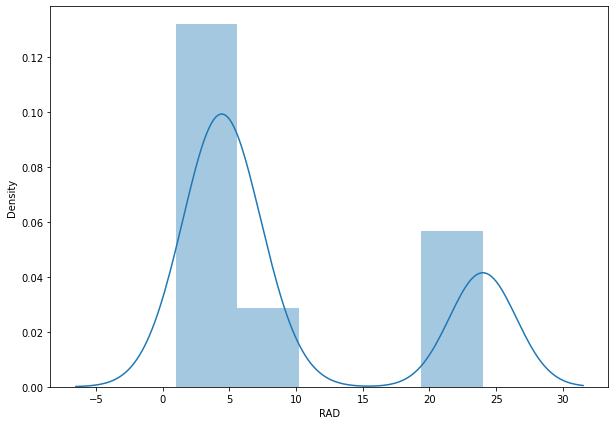

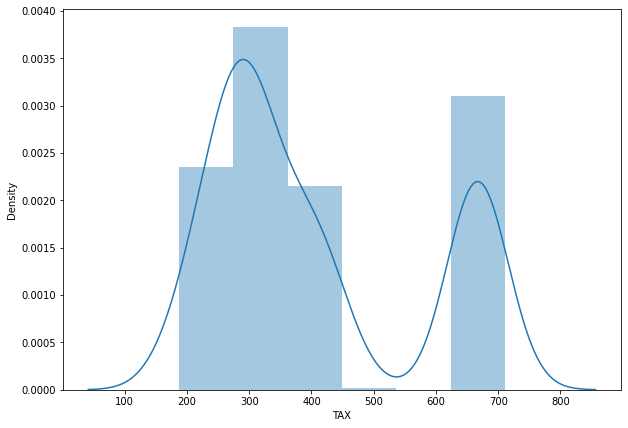

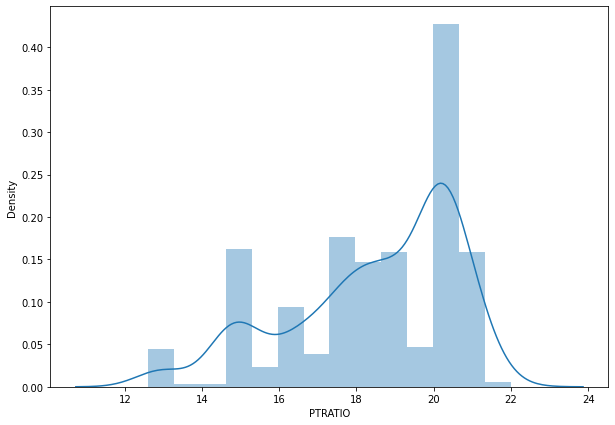

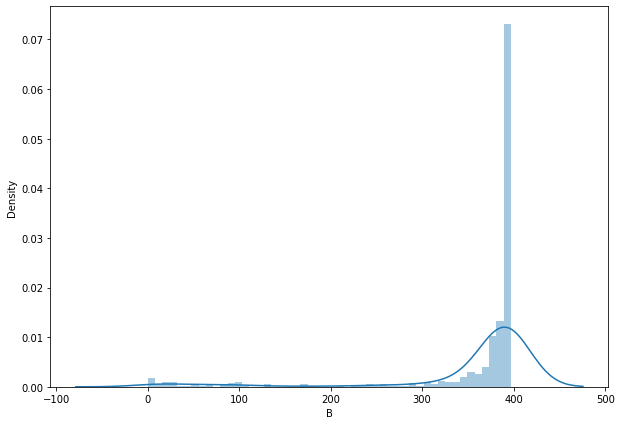

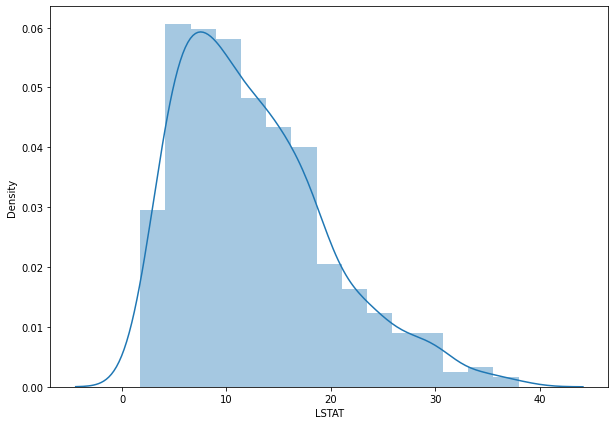

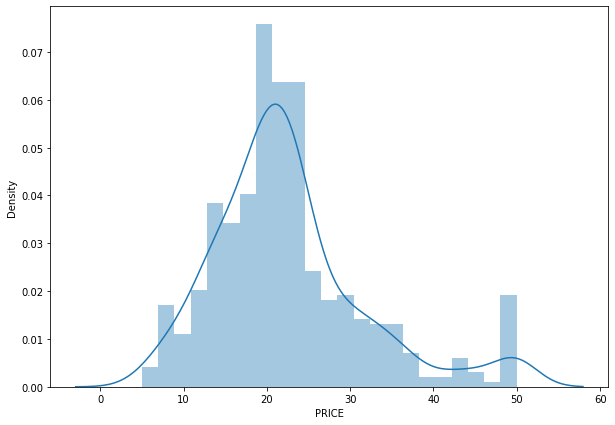

In [21]:
for i in feature_names:
  plt.figure(figsize=[10, 7])
  sns.distplot(df[i])


Распределения носят интересный характер. Некоторые - бимодальны (например, INDUS, TAX), имеются также нормальные распределения со смещениями (пример - PRICE - левое смещение (хвост справа)). Нормальные распределения со смещениями имеют также CRIM, ZN, RM, B. 

## Оценим характер зависимости целевой переменной от каждого признака

Поскольку признак CHAS категориальный - добавим его в качестве hue (доп. параметр).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained un

<Figure size 720x504 with 0 Axes>

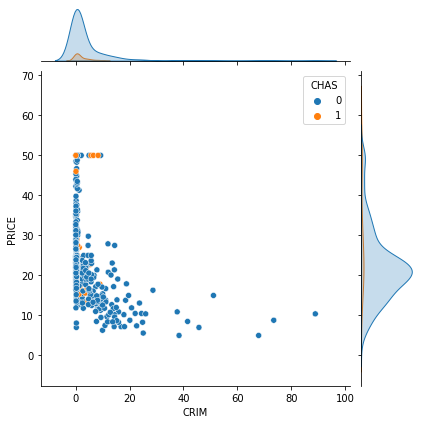

<Figure size 720x504 with 0 Axes>

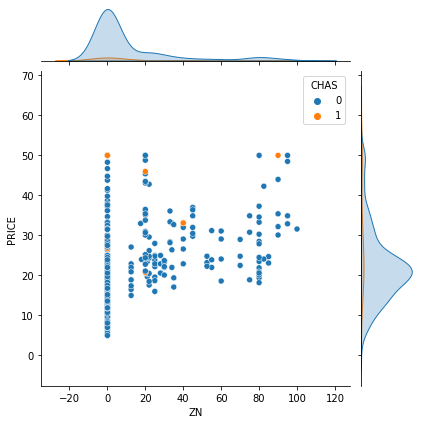

<Figure size 720x504 with 0 Axes>

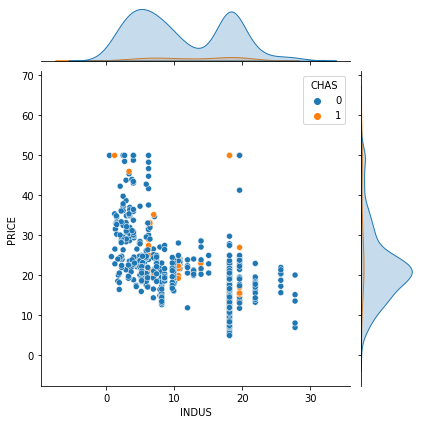

<Figure size 720x504 with 0 Axes>

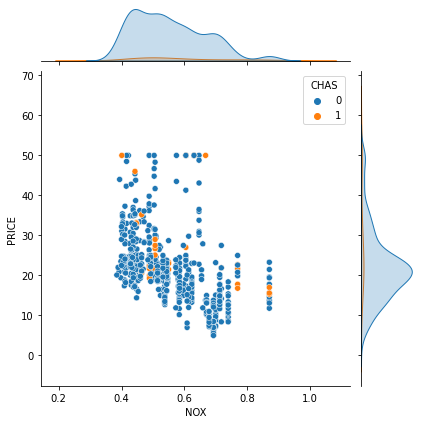

<Figure size 720x504 with 0 Axes>

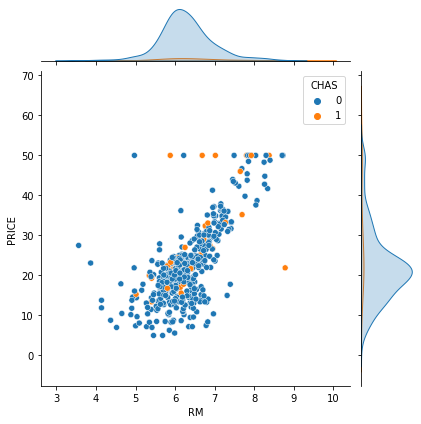

<Figure size 720x504 with 0 Axes>

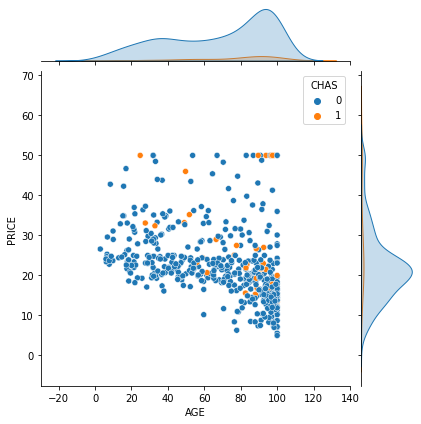

<Figure size 720x504 with 0 Axes>

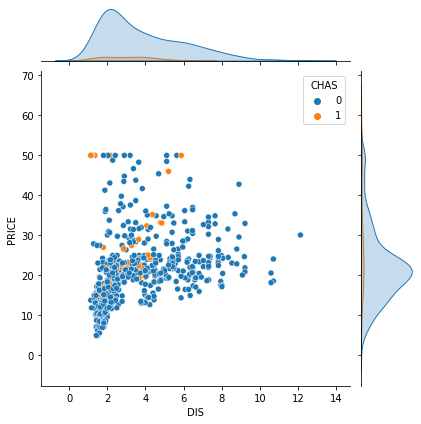

<Figure size 720x504 with 0 Axes>

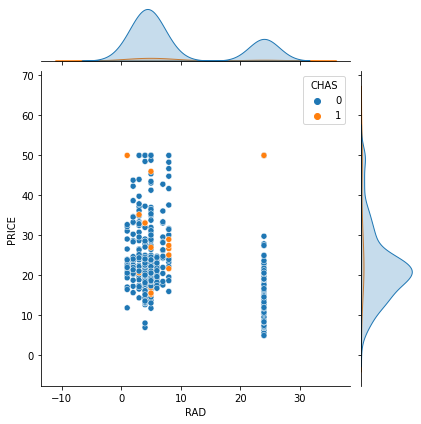

<Figure size 720x504 with 0 Axes>

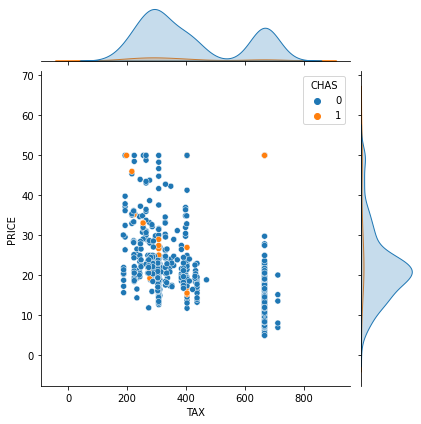

<Figure size 720x504 with 0 Axes>

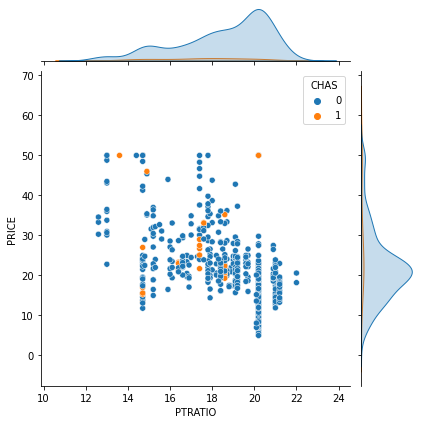

<Figure size 720x504 with 0 Axes>

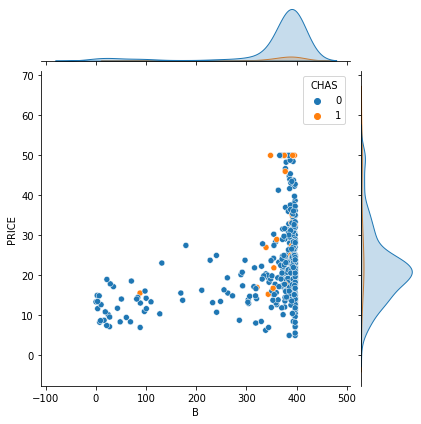

<Figure size 720x504 with 0 Axes>

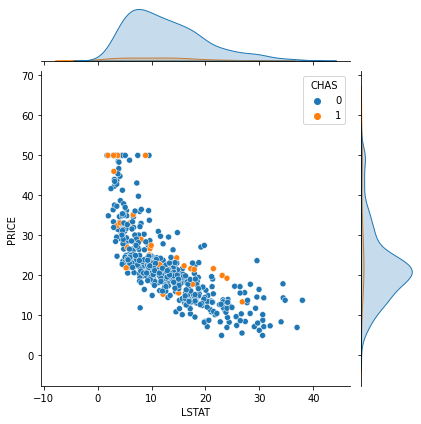

<Figure size 720x504 with 0 Axes>

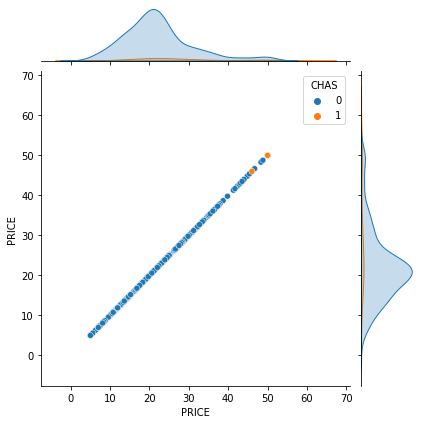

In [22]:
without_CHAS=df.drop(['CHAS'], axis=1) 
for i in without_CHAS:
  plt.figure(figsize=[10, 7])  
  sns.jointplot(x=i, y="PRICE", data=without_CHAS, hue=df["CHAS"])



Оценим результаты. 

Во-первых, наибольшее влияние на стоимость квартиры оказывает количество комнат RM (имеются однако и выбросы), чем больше комнат - тем выше стоимость квартиры. Обратную зависимость можно пронаблюдать для показателя LSTAT - чем выше (в процентах) бедных людей, тем дешевле квартира. Также возраст постройки обратно пропорционально влияет на стоимость квартиры. 

Данные выводы можно сделать как по матрице корреляции, так и по графической зависимости цены от всех показателей для всех данных.

Чтобы данные были более приближены к реальности, нормализуем веса!


# Займемся нормализацией данных!

Применим трансформер sklearn.preprocessing.StandardScaler к данным


----- Weights -----
CRIM | -1.108346015417754
ZN | 0.8084399775400835
INDUS | 0.3431346557047933
CHAS | 0.8138642573885838
NOX | -1.7980429490588932
RM | 2.9138579955497654
AGE | -0.2989391755039209
DIS | -2.9425114769806915
RAD | 2.094193030043761
TAX | -1.447067312811984
PTRATIO | -2.05232232408682
B | 1.0237518746405991
LSTAT | -3.8857900211493894
Bias: 23.01581920903955


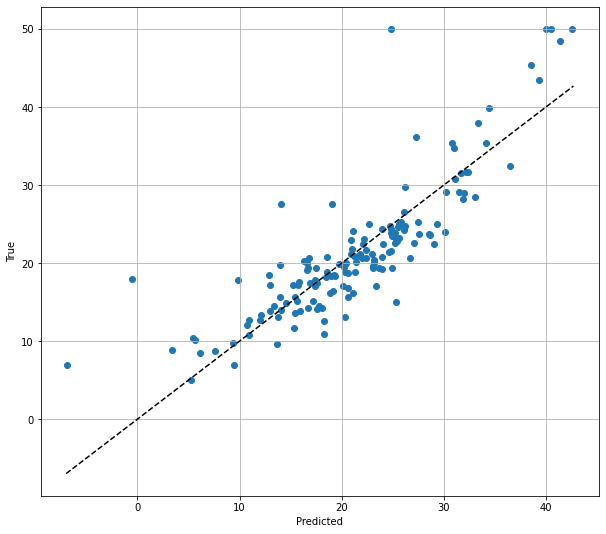

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = LinearRegression()
# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)


По внешнему виду - график не изменился. Сравним метрики!

In [24]:
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682065

----- Evaluation for test -----
  R2: 0.7112260057484932
  RMSE: 4.638689926172821
  MAE: 3.162709871457406


## Метрики одинаковы. Применение данной нормализации не дало результата!

Применим трансформер sklearn.preprocessing.MinMaxScaler к данным и проделаем те же процедуры!


----- Weights -----
CRIM | -11.874453326332448
ZN | 3.4018467913571957
INDUS | 1.3138357776880198
CHAS | 3.1198351162853952
NOX | -7.492691595119078
RM | 19.949248622000347
AGE | -1.0507030964564752
DIS | -15.24168408021582
RAD | 5.5827288159117545
TAX | -4.559970807607127
PTRATIO | -8.560440956236727
B | 4.677310480676527
LSTAT | -19.82738645674022
Bias: 26.028229324073685


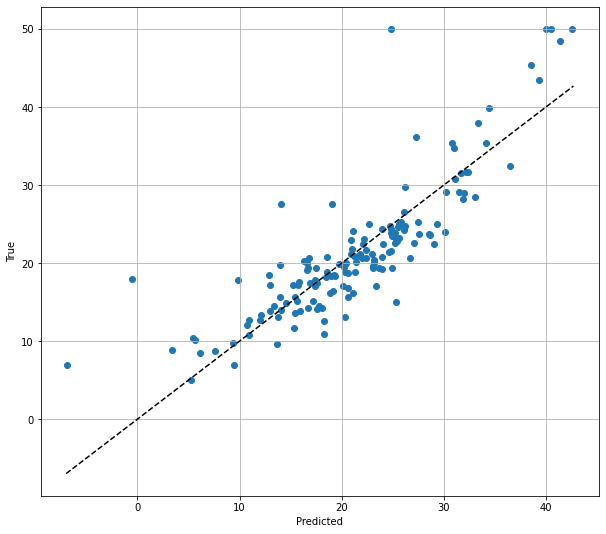

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()
# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

In [26]:
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682047

----- Evaluation for test -----
  R2: 0.7112260057484927
  RMSE: 4.638689926172824
  MAE: 3.1627098714574067


## Для минимаксной нормализации значительно поменялись веса, однако показатели R2, RMSE и MAE все те же, следовательно - значительных изменений в модели быть не может.

# Изучим работу инструментов выравнивания распределений:

 ## sklearn.preprocessing.PowerTransformer 


----- Weights -----
CRIM | -0.13156466464394423
ZN | 0.19951252047411283
INDUS | -0.661968941043374
CHAS | 0.8070988287388107
NOX | -1.593975913739194
RM | 1.953238668377283
AGE | 0.14000510013869283
DIS | -3.2702370734918667
RAD | 0.3842721775169
TAX | 6.661338147750939e-15
PTRATIO | -1.6118671671696452
B | 0.5688864225523941
LSTAT | -5.812179493282584
Bias: 23.01581920903956


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


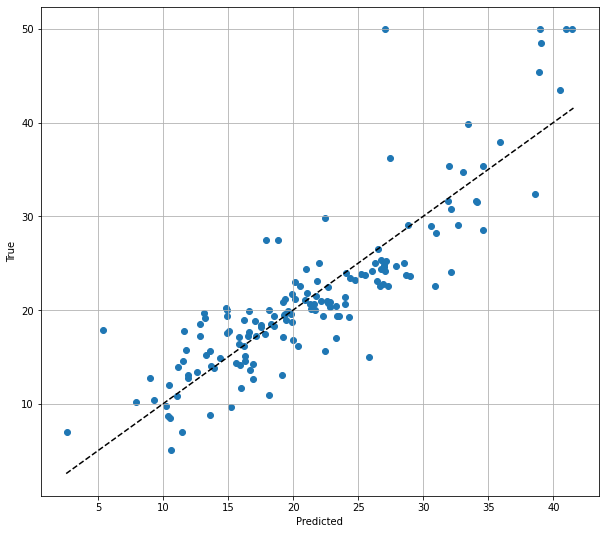

In [27]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
transformer.fit(X_train)

# Стандартизация данных
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)

reg.fit(X_train_scaled, y_train) # обучаем модель 
show_linear_model_weights(reg, X_train.columns)

y_pred = reg.predict(X_test_scaled)# находим прогнозируемый параметр (цену)

draw_predictions_plot(y_pred, y_test)

In [28]:
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7671674226821155
  RMSE: 4.523845209628152
  MAE: 3.3452541600761636

----- Evaluation for test -----
  R2: 0.7412232713454906
  RMSE: 4.391156466464553
  MAE: 3.1620670158148196


Можно также заменить изменение весов, метрика R2 стала больще - модель работает лучше. Оценка RMSE также стала меньше. Можно сказать, что такой трансформер лучше подходит модели.

## sklearn.preprocessing.QuantileTransforme


----- Weights -----
CRIM | -0.6362226263073035
ZN | 0.21088587327523878
INDUS | -0.19734215537182886
CHAS | 0.2550801795768098
NOX | -1.011264833210819
RM | 1.393259496337682
AGE | -0.04352523402990527
DIS | -3.4021972417352995
RAD | 0.09934446536489239
TAX | -1.1599834717049708
PTRATIO | -1.3539061407981228
B | -0.11848933158138589
LSTAT | -5.560288993227165
Bias: 24.941462993723686


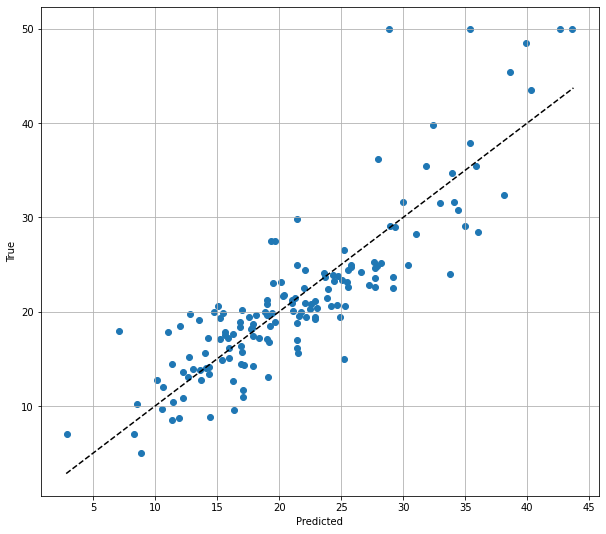

In [29]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(n_quantiles=100,output_distribution='normal')
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
transformer.fit(X_train)

# Стандартизация данных
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)

reg.fit(X_train_scaled, y_train) # обучаем модель 
show_linear_model_weights(reg, X_train.columns)

y_pred = reg.predict(X_test_scaled)# находим прогнозируемый параметр (цену)

draw_predictions_plot(y_pred, y_test)

In [30]:
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7567654107100403
  RMSE: 4.623794570689766
  MAE: 3.4528791234159844

----- Evaluation for test -----
  R2: 0.7476914371087464
  RMSE: 4.335930356833141
  MAE: 3.1722290695978144


Метрика R2 для тестовой выборки немного повысилась, а для тренировочной снизилась. Применение данного трансформера не дало значительных результатов.

# Постараемся улучшить модель.

Исключим выбросы на уровне максимальных цен. 


----- Weights -----
CRIM | -0.12381878117351394
ZN | 0.04038991169297008
INDUS | -0.04633642800193789
CHAS | -0.029973239830924307
NOX | -14.688063333672863
RM | 3.333246719403874
AGE | -0.021294868200934354
DIS | -1.3881850773173994
RAD | 0.23160877762484414
TAX | -0.012433320325953387
PTRATIO | -0.8576286263011887
B | 0.006898412474272638
LSTAT | -0.3753130106657583
Bias: 37.5599334261054

----Для нынешнего случая (исключили выбросы цены=50)------

----- Evaluation for train -----
  R2: 0.7798306337503477
  RMSE: 3.778282589754244
  MAE: 2.7961504147140688

----- Evaluation for test -----
  R2: 0.7538446825846039
  RMSE: 3.5951405792699194
  MAE: 2.7775138468973313

---Сравниваем с предыдущим трансформером---

----- Evaluation for train -----
  R2: 0.7567654107100403
  RMSE: 4.623794570689766
  MAE: 3.4528791234159844

----- Evaluation for test -----
  R2: 0.7476914371087464
  RMSE: 4.335930356833141
  MAE: 3.1722290695978144


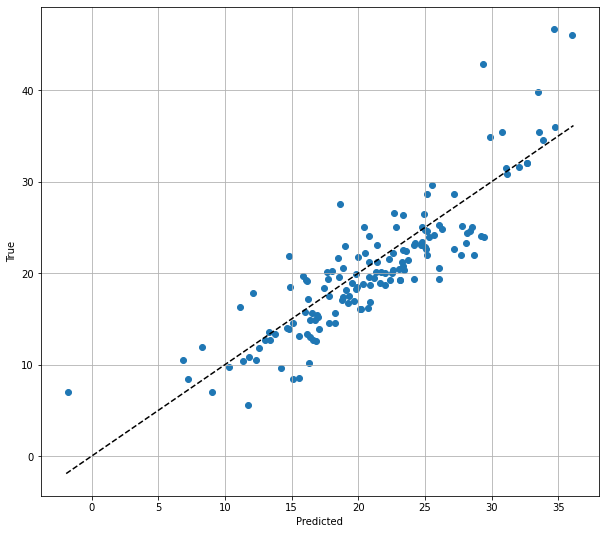

In [31]:
df_new=df[df['PRICE'] < 50]# новый массив без цен=50

X = df_new.drop(['PRICE'], axis=1)# выбрасываем столбец с ценами (ибо если он)
# останется, то ничего хорошего не выйдет, цена будет определять себя сама
# y - истинные значения (разметка)
y = df_new['PRICE'] # целевой параметр
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    train_size=0.7, 
    random_state=RANDOM_STATE
)

reg_new = LinearRegression();
reg_new.fit(X_train_new, y_train_new)
show_linear_model_weights(reg_new, X_train_new.columns)

y_pred_new = reg_new.predict(X_test_new)
draw_predictions_plot(y_pred_new, y_test_new)
print()
print('----Для нынешнего случая (исключили выбросы цены=50)------')
evaluate_regressor(reg_new, X_train_new, y_train_new, 'train')
evaluate_regressor(reg_new, X_test_new, y_test_new, 'test')
print()
print('---Сравниваем с предыдущим трансформером---')
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

## При исключении выбросов на уровне максимальной цены получаются лучшие знаения всех метрик, модель стала работать лучше.

# Оценим работу при исключении каждого из признаков. Проведем серию из 13 экспериментов. Результаты представим в виде таблицы DataFrame.

Для этого чуть подправим функцию для метрик.

In [32]:
def evaluate_regressor_new(reg, X, y,mode):
    y_pred = reg.predict(X)
    r2 = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)
    return r2, rmse_score, mae_score

In [33]:
y = df['PRICE']
Z = df.drop(['PRICE'], axis=1) # правильный размер
without = pd.DataFrame(columns = ['R2_train', 'RMSE_train', 'MAE_train','R2_test', 'RMSE_test', 'MAE_test'], 
                       index=list(Z))

reg = LinearRegression();
for i in Z:
  X = df.drop(columns=[i, 'PRICE'])
  X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, 
    train_size=0.7,
    random_state=RANDOM_STATE
  )
  
  reg.fit(X_train_new, y_train_new)
  y_pred_new = reg.predict(X_test_new)
  without.loc[i,['R2_train', 'RMSE_train', 'MAE_train']]=evaluate_regressor_new(reg, X_train_new, y_train_new,'train')
  without.loc[i,['R2_test', 'RMSE_test', 'MAE_test']]=evaluate_regressor_new(reg, X_test_new, y_test_new,'test')

without

,R2_train,RMSE_train,MAE_train,R2_test,RMSE_test,MAE_test
CRIM,0.735429,4.82233,3.3952,0.715061,4.60778,3.13734
ZN,0.740394,4.77686,3.39217,0.697831,4.74505,3.24995
INDUS,0.743151,4.75144,3.3615,0.71241,4.62917,3.14422
CHAS,0.736665,4.81105,3.37897,0.708814,4.65802,3.20433
NOX,0.735551,4.82122,3.36302,0.690537,4.80198,3.23687
RM,0.693006,5.19458,3.72381,0.683052,4.85971,3.49986
AGE,0.74316,4.75135,3.36037,0.713868,4.61742,3.12911
DIS,0.718693,4.97251,3.49345,0.670199,4.95726,3.33199
RAD,0.736878,4.80911,3.36305,0.688301,4.8193,3.28564
TAX,0.740817,4.77298,3.36438,0.698385,4.7407,3.24129


## Выводы: если исключить, например, признаки CHAS и AGE - модель станет работать лучше (R2 повысится). Если же исключть признаки RM, PTRATIO и LTSAT - станет работать хуже (они сильно коррелируют с ценой).

# Применим трансформер sklearn.preprocessing.PolynomialFeatures для генерации признака LSTAT в квадрате, обучим модель на данных с новым признаком, оценим работу модели


----- Evaluation for train -----
  R2: 0.7900154484992744
  RMSE: 4.296150987499626
  MAE: 3.103043927750793

----- Evaluation for test -----
  R2: 0.7734457360506537
  RMSE: 4.108680995278827
  MAE: 2.9527724878930814


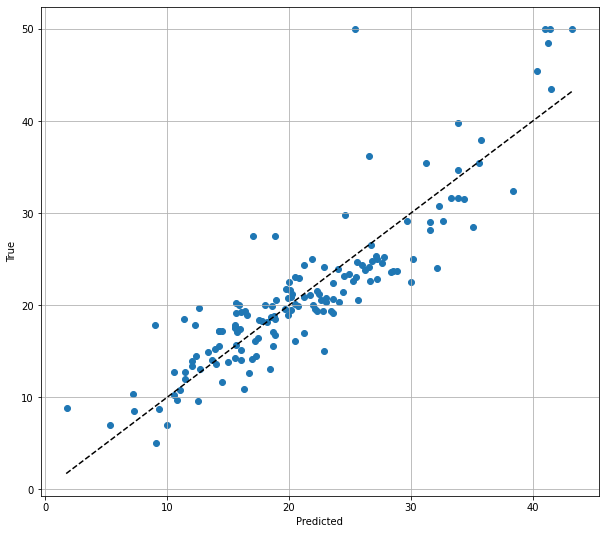

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
reg = LinearRegression();
# выделим нужный признак

poly_X_train=np.array(X_train['LSTAT']).reshape(-1,1)
poly_X_test=np.array(X_test['LSTAT']).reshape(-1,1)
poly.fit(poly_X_train)# Обучаем на выборке для обучения с помощью метода fit

X_train_new = poly.transform(poly_X_train)
X_test_new = poly.transform(poly_X_test)

X_train_new = np.concatenate((np.array(X_train.drop(columns=['LSTAT'])), X_train_new), axis=1) 
X_test_new = np.concatenate((np.array(X_test.drop(columns=['LSTAT'])), X_test_new), axis=1)

reg.fit(X_train_new, y_train)
y_pred = reg.predict(X_test_new)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_new, y_train, 'train')
evaluate_regressor(reg, X_test_new, y_test, 'test')

 Модель стала работать значительно лучше, метрика R2 все ближе к единице.

# **Создадим базовую модель ридж регрессии**

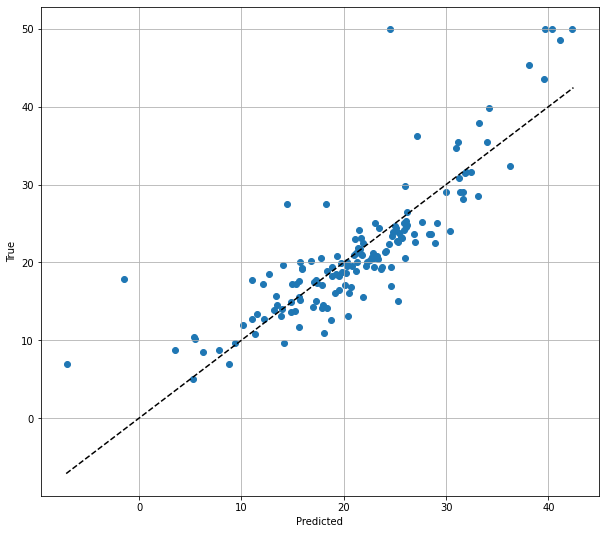

In [35]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1.0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
draw_predictions_plot(y_pred, y_test)

Оценим метрики для такого типа модели.

In [36]:
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7415671063241829
  RMSE: 4.766062781838816
  MAE: 3.3419355089653857

----- Evaluation for test -----
  R2: 0.7041586727559435
  RMSE: 4.695109486461526
  MAE: 3.178539076034557


Метрики практически такие же, как и для LinearRegression().

Теперь, используем методы нормализации и вырванивания распределения чтобы оценить работу модели с Ридж Регрессией.


1. StandartScaler  и MinMaxScaler

-------------
StandardScaler(copy=True, with_mean=True, with_std=True)
-------------

----- Evaluation for train -----
  R2: 0.743482391414018
  RMSE: 4.748368933454408
  MAE: 3.3520641215891938

----- Evaluation for test -----
  R2: 0.7108071617209415
  RMSE: 4.6420527351841026
  MAE: 3.161026516515537
-------------
MinMaxScaler(copy=True, feature_range=(0, 1))
-------------

----- Evaluation for train -----
  R2: 0.7387251833812362
  RMSE: 4.792196740950352
  MAE: 3.3491646276433173

----- Evaluation for test -----
  R2: 0.711020981158772
  RMSE: 4.640336329192624
  MAE: 3.1087318709305003


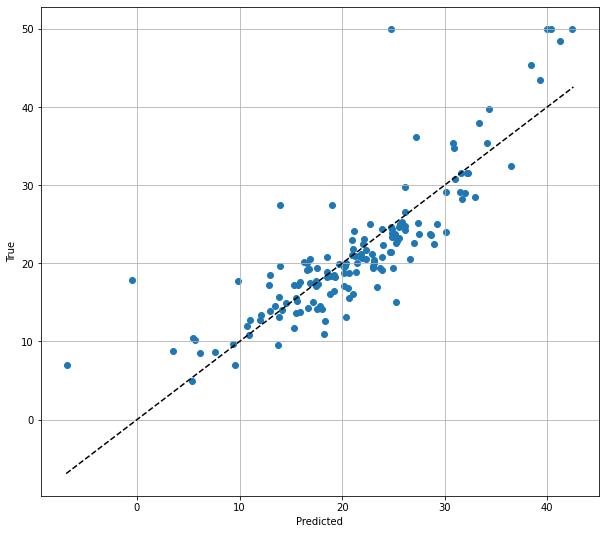

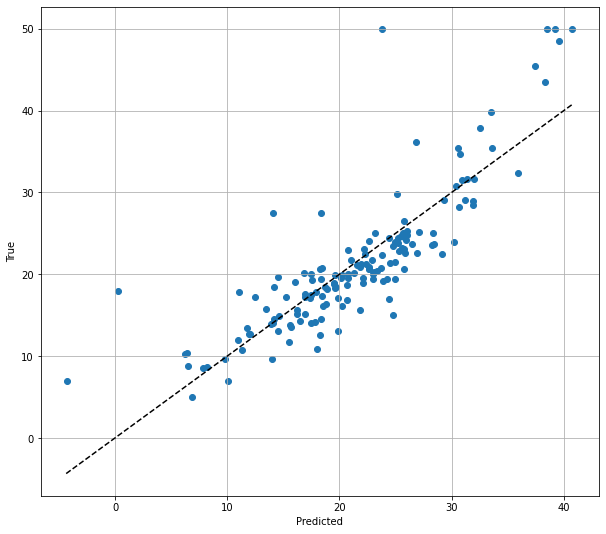

In [37]:
Array_of_scalers = [StandardScaler(), MinMaxScaler()]

for i in range(0,2,1):
  scaler = Array_of_scalers[i]
# "Обучение" трансформера - определение параметров средних и отклонений
  scaler.fit(X_train)

# Стандартизация данных
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  reg = Ridge(alpha=1)

  reg.fit(X_train_scaled, y_train)
  
  y_pred = reg.predict(X_test_scaled)
  draw_predictions_plot(y_pred, y_test)
  
  print('-------------')
  print(Array_of_scalers[i])
  print('-------------')
  evaluate_regressor(reg, X_train_scaled, y_train, 'train')
  evaluate_regressor(reg,  X_test_scaled, y_test, 'test') 



В сравнении с линейной моделью, метрики практически не помненялись, даже немного ухудшились.

2. Power Transformer и QuantileTransformer

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


-------------
PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
-------------

----- Evaluation for train -----
  R2: 0.7671538602313817
  RMSE: 4.523976964245666
  MAE: 3.342412393327308

----- Evaluation for test -----
  R2: 0.740795451130297
  RMSE: 4.394784786716414
  MAE: 3.157433953239507
-------------
QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=100,
                    output_distribution='normal', random_state=None,
                    subsample=100000)
-------------

----- Evaluation for train -----
  R2: 0.7567567894421723
  RMSE: 4.623876513431656
  MAE: 3.4517050209479367

----- Evaluation for test -----
  R2: 0.7477132581605501
  RMSE: 4.335742855058258
  MAE: 3.168092637317798


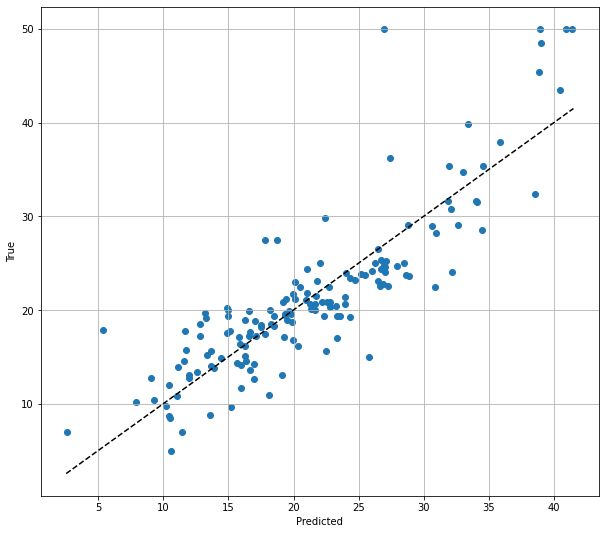

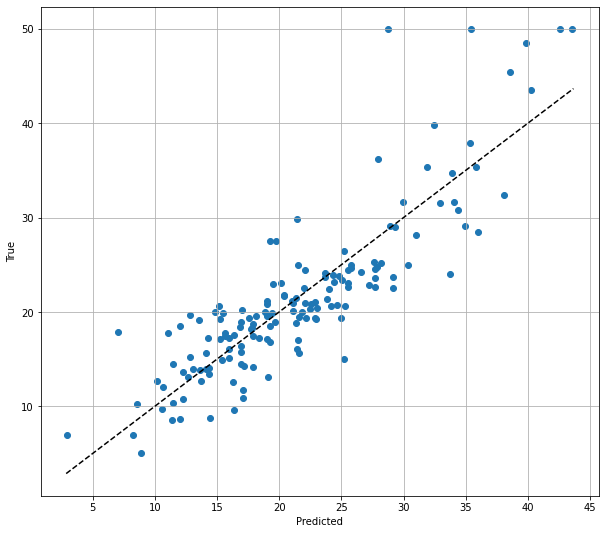

In [38]:
Array_of_transf = [PowerTransformer(), QuantileTransformer(n_quantiles=100,output_distribution='normal')]
for i in range(0,2,1):
  transformer = Array_of_transf[i]
  reg = Ridge(alpha=1)

# "Обучение" трансформера - определение параметров средних и отклонений
  transformer.fit(X_train)

# Стандартизация данных
  X_train_scaled = transformer.transform(X_train)
  X_test_scaled = transformer.transform(X_test)

  reg.fit(X_train_scaled, y_train) # обучаем модель 

  y_pred = reg.predict(X_test_scaled)# находим прогнозируемый параметр (цену)
  draw_predictions_plot(y_pred, y_test)

  print('-------------')
  print(Array_of_transf[i])
  print('-------------')
  evaluate_regressor(reg, X_train_scaled, y_train, 'train')
  evaluate_regressor(reg,  X_test_scaled, y_test, 'test') 


По сравнению с базовой моделью немного улучшились метрики для PowerTransformer. В остальном - все одинаковое.

**Изучим работу модели для разных альфа (не менее 7 шт). Результаты отобразим на графике.**

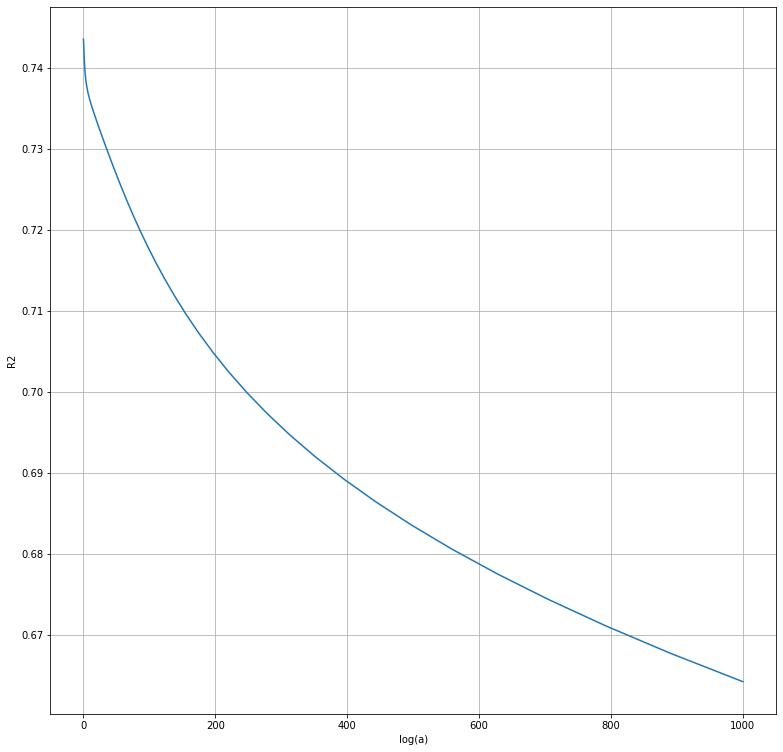

In [39]:
# создадим пустой массив метрик R2
R2 =[]
a = np.logspace(-2,3,100) # создаем альфа
for i in a:
  reg = Ridge(i)
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  
  r2_now= evaluate_regressor_new(reg, X_train, y_train,'train')[0] # вынимаем 
  # только первый элемент
  R2.append(r2_now)
  
plt.figure(figsize=(13, 13))
plt.plot(a, R2)
plt.xlabel('log(a)')
plt.ylabel('R2')
plt.grid()
plt.show()

Чем выше значение альфа, тем ниже метрика R2 - тем хуже работает система. Для хорошей работы системы необходимо выбирать малое значение альфа.

# **Разработаем лучшую модель по ранее приведенным экспериментам**

Для этого, вспомним результаты экспериментов.
1. Исключим выбросы PRICE = 50;
2. Применим LSTAT^2;
3. Используем Ридж-регрессию с альфа равным 0.01


----- Evaluation for train -----
  R2: 0.8100073172052747
  RMSE: 3.5098166392296632
  MAE: 2.63349935947252

----- Evaluation for test -----
  R2: 0.7873025834823739
  RMSE: 3.3418917149035527
  MAE: 2.569461281226277


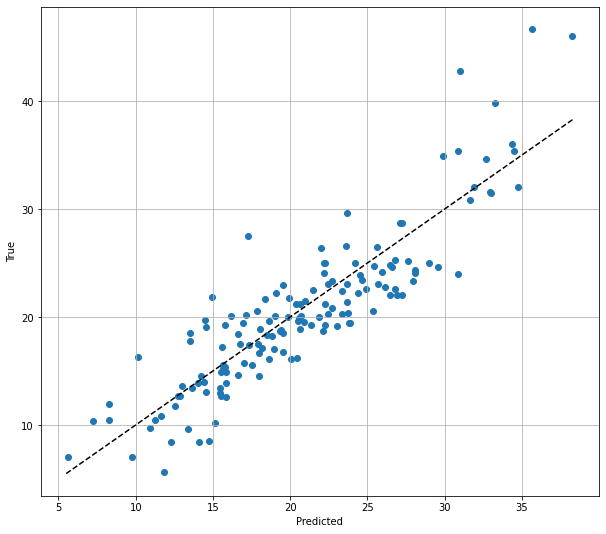

In [46]:
df_new=df[df['PRICE'] < 50]# новый массив без цен=50

X = df_new.drop(['PRICE'], axis=1)# выбрасываем столбец с ценами (ибо если он)
# останется, то ничего хорошего не выйдет, цена будет определять себя сама
# y - истинные значения (разметка)
y = df_new['PRICE'] # целевой параметр

X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    train_size=0.7, 
    random_state=RANDOM_STATE
)

poly = PolynomialFeatures(degree = 2)

poly_X_train=np.array(X_train['LSTAT']).reshape(-1,1)
poly_X_test=np.array(X_test['LSTAT']).reshape(-1,1)
poly.fit(poly_X_train)# Обучаем на выборке для обучения с помощью метода fit

X_train_new = poly.transform(poly_X_train)
X_test_new = poly.transform(poly_X_test)

X_train_new = np.concatenate((np.array(X_train.drop(columns=['LSTAT'])), X_train_new), axis=1) 
X_test_new = np.concatenate((np.array(X_test.drop(columns=['LSTAT'])), X_test_new), axis=1)


reg_new = Ridge(0.001);
reg_new.fit(X_train_new, y_train)


y_pred_new = reg_new.predict(X_test_new)
draw_predictions_plot(y_pred_new, y_test)

evaluate_regressor(reg_new, X_train_new, y_train, 'train')
evaluate_regressor(reg_new, X_test_new, y_test, 'test')



Дальнейшие изменения для модели (добавление инструментов нормализации и выравнивания распределение) практически никак не сказываются на метриках модели (даже делают хуже). Оптимальными решениями для модели считаются исключения выбросов и применение фичи LSTAT^2. Метрика R2 максимально за всю работу приблизилась к единице. Также было замечено, что показатели для Ридж модели и линейной практически одинаковы.